In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
sns.set(style="whitegrid")

In [3]:
# creat a small dataset (CSV) for practice 

In [4]:
sample_data = {
    "Area_Sqft": [850, 1200, 1500, 2000, 2200, 950, 1100, 1800, 1300, 2400],
    "Bedrooms": [1, 2, 3, 3, 1, 2, 4, 3, 2, 4],
    "Bathroom": [1, 1, 2, 2, 1, 1, 3, 2, 1, 3],
    "Age_years": [10, 5, 20, 2, 15, 8, 1, 12, 7, 3],
    "Distance_to_City_km": [8.5, 4.2, 6.0, 2.0, 9.0, 5.0, 1.0, 3.5, 4.8, 2.2],
    # A realistic_is target (price in 000s)
    "Price_Thousand": [75, 120, 150, 250, 90, 110, 500, 220, 140, 300]
    
}

In [5]:
df = pd.DataFrame(sample_data)

In [6]:
df.to_csv("House_Price.csv", index=False)

In [7]:
df.head()

,Area_Sqft,Bedrooms,Bathroom,Age_years,Distance_to_City_km,Price_Thousand
0,850,1,1,10,8.5,75
1,1200,2,1,5,4.2,120
2,1500,3,2,20,6.0,150
3,2000,3,2,2,2.0,250
4,2200,1,1,15,9.0,90


In [8]:
df.shape

(10, 6)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Area_Sqft            10 non-null     int64  
 1   Bedrooms             10 non-null     int64  
 2   Bathroom             10 non-null     int64  
 3   Age_years            10 non-null     int64  
 4   Distance_to_City_km  10 non-null     float64
 5   Price_Thousand       10 non-null     int64  
dtypes: float64(1), int64(5)
memory usage: 612.0 bytes


In [10]:
df.describe()

,Area_Sqft,Bedrooms,Bathroom,Age_years,Distance_to_City_km,Price_Thousand
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,1530.000000,2.500000,1.700000,8.300000,4.620000,195.500000
std,542.217668,1.080123,0.823273,6.074537,2.657819,129.538712
min,850.000000,1.000000,1.000000,1.000000,1.000000,75.000000
25%,1125.000000,2.000000,1.000000,3.500000,2.525000,112.500000
50%,1400.000000,2.500000,1.500000,7.500000,4.500000,145.000000
75%,1950.000000,3.000000,2.000000,11.500000,5.750000,242.500000
max,2400.000000,4.000000,3.000000,20.000000,9.000000,500.000000


In [11]:
#visual overview

<Figure size 800x500 with 0 Axes>

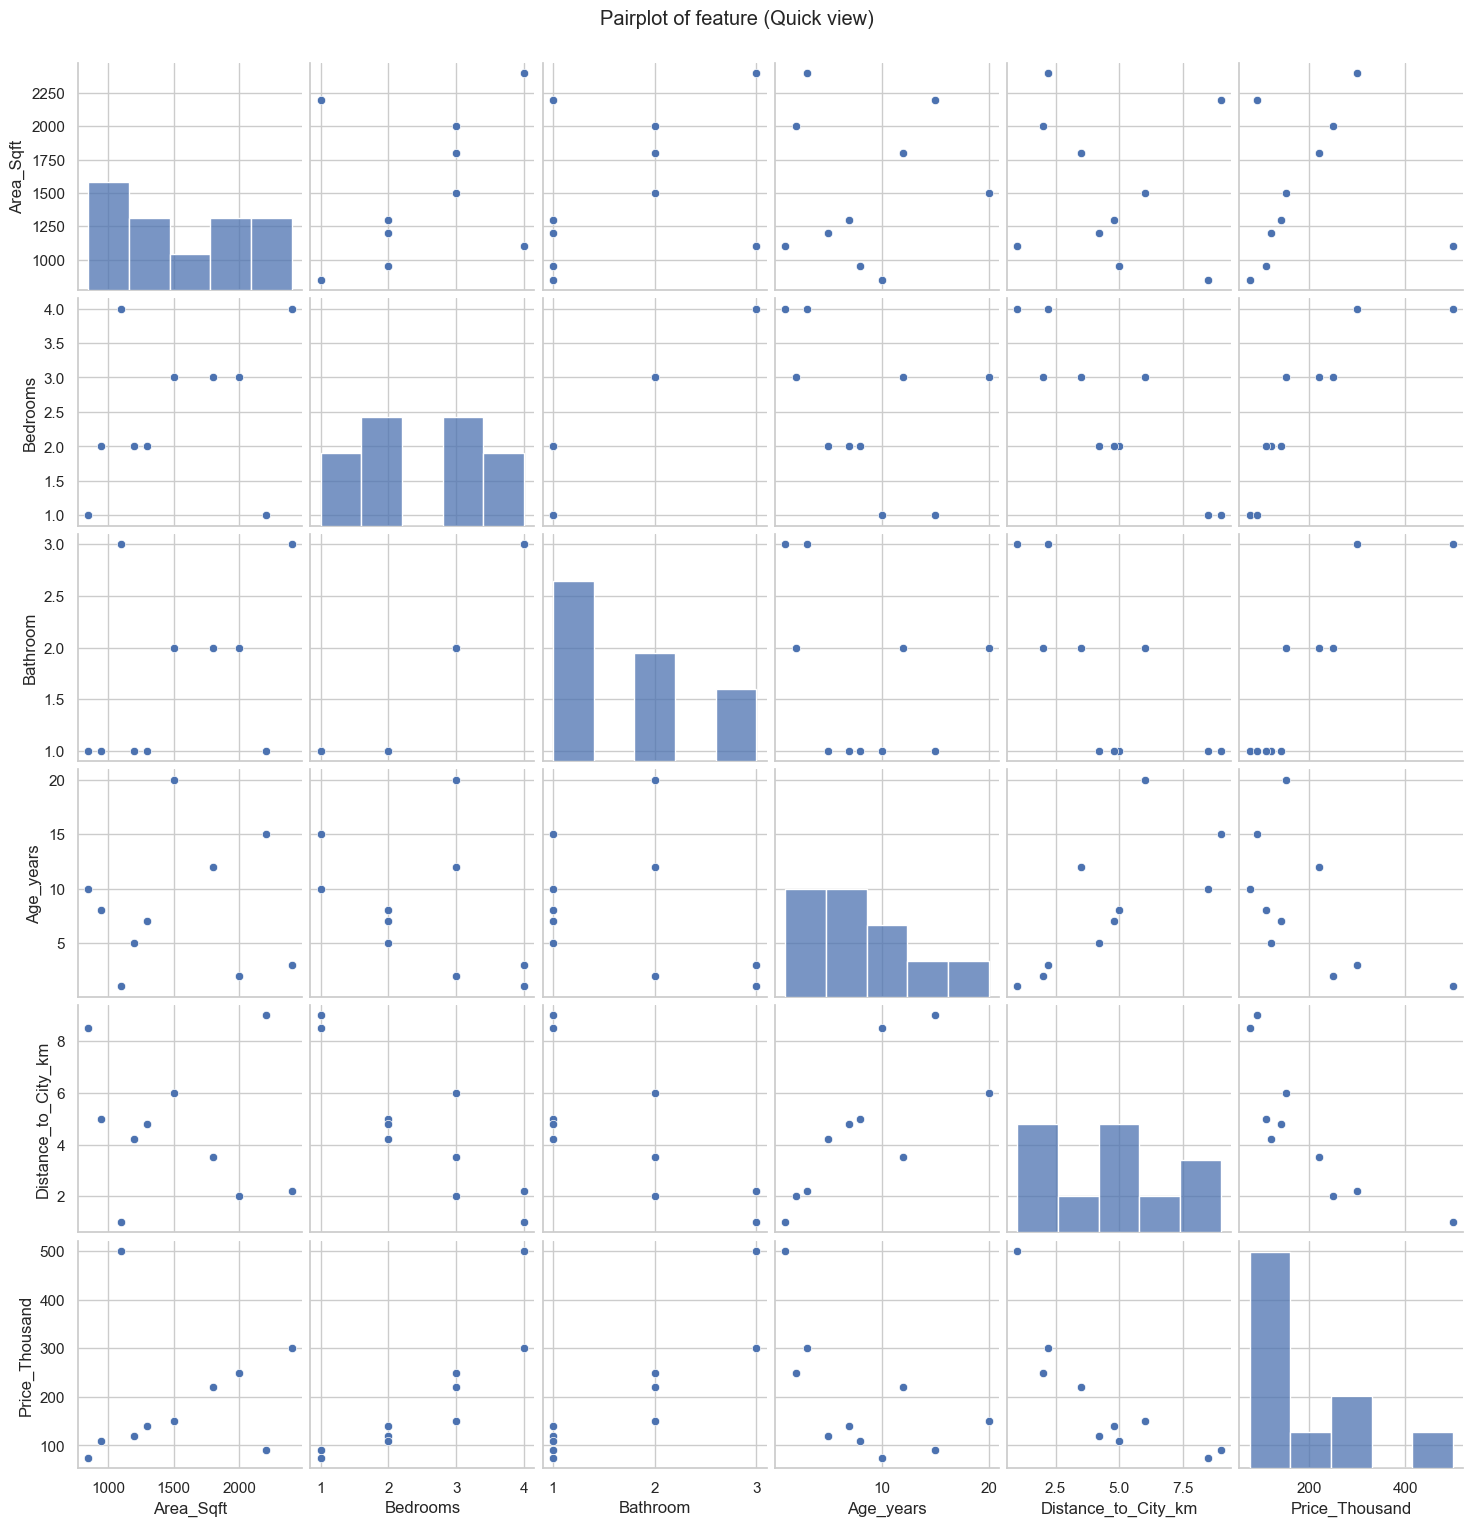

In [15]:
plt.figure(figsize=(8,5))
sns.pairplot(df)
plt.suptitle("Pairplot of feature (Quick view)", y=1.02)
plt.show()

In [19]:
df_model = df.copy()

In [21]:
x = df_model.drop("Price_Thousand", axis=1)
y = df_model["Price_Thousand"]

In [22]:
print(x.columns.tolist())

['Area_Sqft', 'Bedrooms', 'Bathroom', 'Age_years', 'Distance_to_City_km']


In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [24]:
print("\nTrain size:", x_train.shape[0], "Test size:", x_test.shape[0])


Train size: 7 Test size: 3


In [25]:
# Model 1: Linear Regression

In [30]:

linreg = LinearRegression()
linreg.fit(x_train, y_train)

y_pred_lr = linreg.predict(x_test)

rmse_lr = (mean_squared_error(y_test, y_pred_lr)) ** 0.5
r2_lr = r2_score(y_test, y_pred_lr)

print("RMSE:", rmse_lr)
print("R2 Score:", r2_lr)

RMSE: 188.35895514167132
R2 Score: -227.07990274182805


In [32]:

rf = RandomForestRegressor()
rf.fit(x_train, y_train)

y_pred_rf = rf.predict(x_test)

rmse_rf = mean_squared_error(y_test, y_pred_rf) ** 0.5
r2_rf = r2_score(y_test, y_pred_rf)

In [33]:
print(f"Random Forest -> RMSE: {rmse_rf:.3f} (Thousand), R2: {r2_rf:.3f}")

Random Forest -> RMSE: 60.193 (Thousand), R2: -22.292


In [34]:
# visulation preductions vs true values

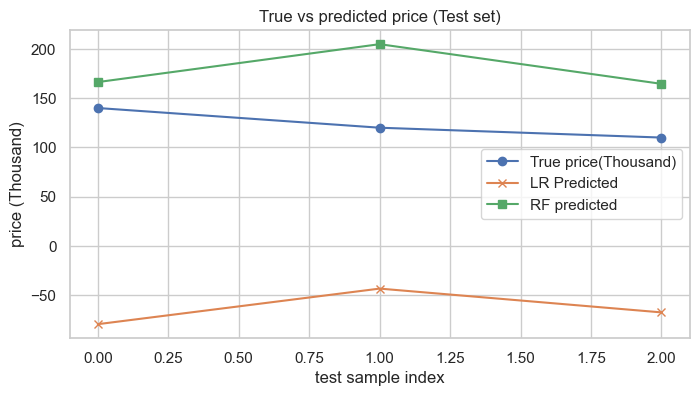

In [35]:
plt.figure(figsize=(8,4))
plt.plot(y_test.values, label="True price(Thousand)", marker="o")
plt.plot(y_pred_lr, label="LR Predicted", marker="x")
plt.plot(y_pred_rf, label="RF predicted", marker="s")
plt.legend()
plt.title("True vs predicted price (Test set)")
plt.xlabel("test sample index")
plt.ylabel("price (Thousand)")
plt.show()